In [1]:
from train_network_two_qubit_channel import *
from multiprocessing import Pool
import multiprocessing  as mp

import scipy.io as scio
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

In [2]:
# initialization
counts_X = 50 ;
X_list = [4 * pi * np.random.random((2,8)) for i in range(counts_X)] ;

In [3]:
def train(X):
    _ , cost_history = train_network(X, eps, iters) ;
    return cost_history

In [4]:
if __name__ == "__main__":
    pool = Pool(processes = mp.cpu_count())
    result = pool.map(train, X_list)
    pool.close()
    pool.join()

In [5]:
parameter_history, _ = train_network(X_list[1], eps=0.15, iters=60) ;

In [8]:
axi_list = 2 * pi * np.random.random([2,100]) ;
angle_list = 4 * pi * np.random.random([2,100]) ;

test_psi = [] ;


for i in range(100):
    R1 = cos(angle_list[0][i]/2)* qeye(2) - 1j * sin(angle_list[0][i]/2) * \
       (sigmax() * cos(axi_list[0][i]) + sigmay() * sin(axi_list[0][i]) ) ;
    R2 = cos(angle_list[1][i]/2)* qeye(2) - 1j * sin(angle_list[1][i]/2) * \
       (sigmax() * cos(axi_list[1][i]) + sigmay()* sin(axi_list[1][i]) ) ;
    
    psi = ket2dm(tensor( (R1 * basis(2, 0)), (R2 * basis(2, 0)) ))
    test_psi.append(psi) ;

    

distribution_trained = [];  distribution_untrained = []; 

for j in range(100):
    phiout_desire, _ = forward_th(par_target, test_psi[j]) ;
    phiout_train, _ = forward_th(parameter_history[-1], test_psi[j]) ;
    distribution_trained.append( fidelity(phiout_desire[-1], phiout_train[-1]) ) ;
    
    phiout_untrain, _ = forward_th(parameter_history[0], test_psi[j]) ;
    distribution_untrained.append( fidelity(phiout_desire[-1], phiout_untrain[-1]) ) ;

In [17]:
# scio.savemat('numerical_result_two_qubit_channel.mat', {'learning_curves': learning_curves, 
#                                                         'distribution_untrained': distribution_untrained, 
#                                                         'distribution_trained': distribution_trained})

In [20]:
data = scio.loadmat('numerical_result_two_qubit_channel.mat');
learning_curves = data['learning_curves']
distribution_untrained = data['distribution_untrained'][0] ;
distribution_trained = data['distribution_trained'][0] ;

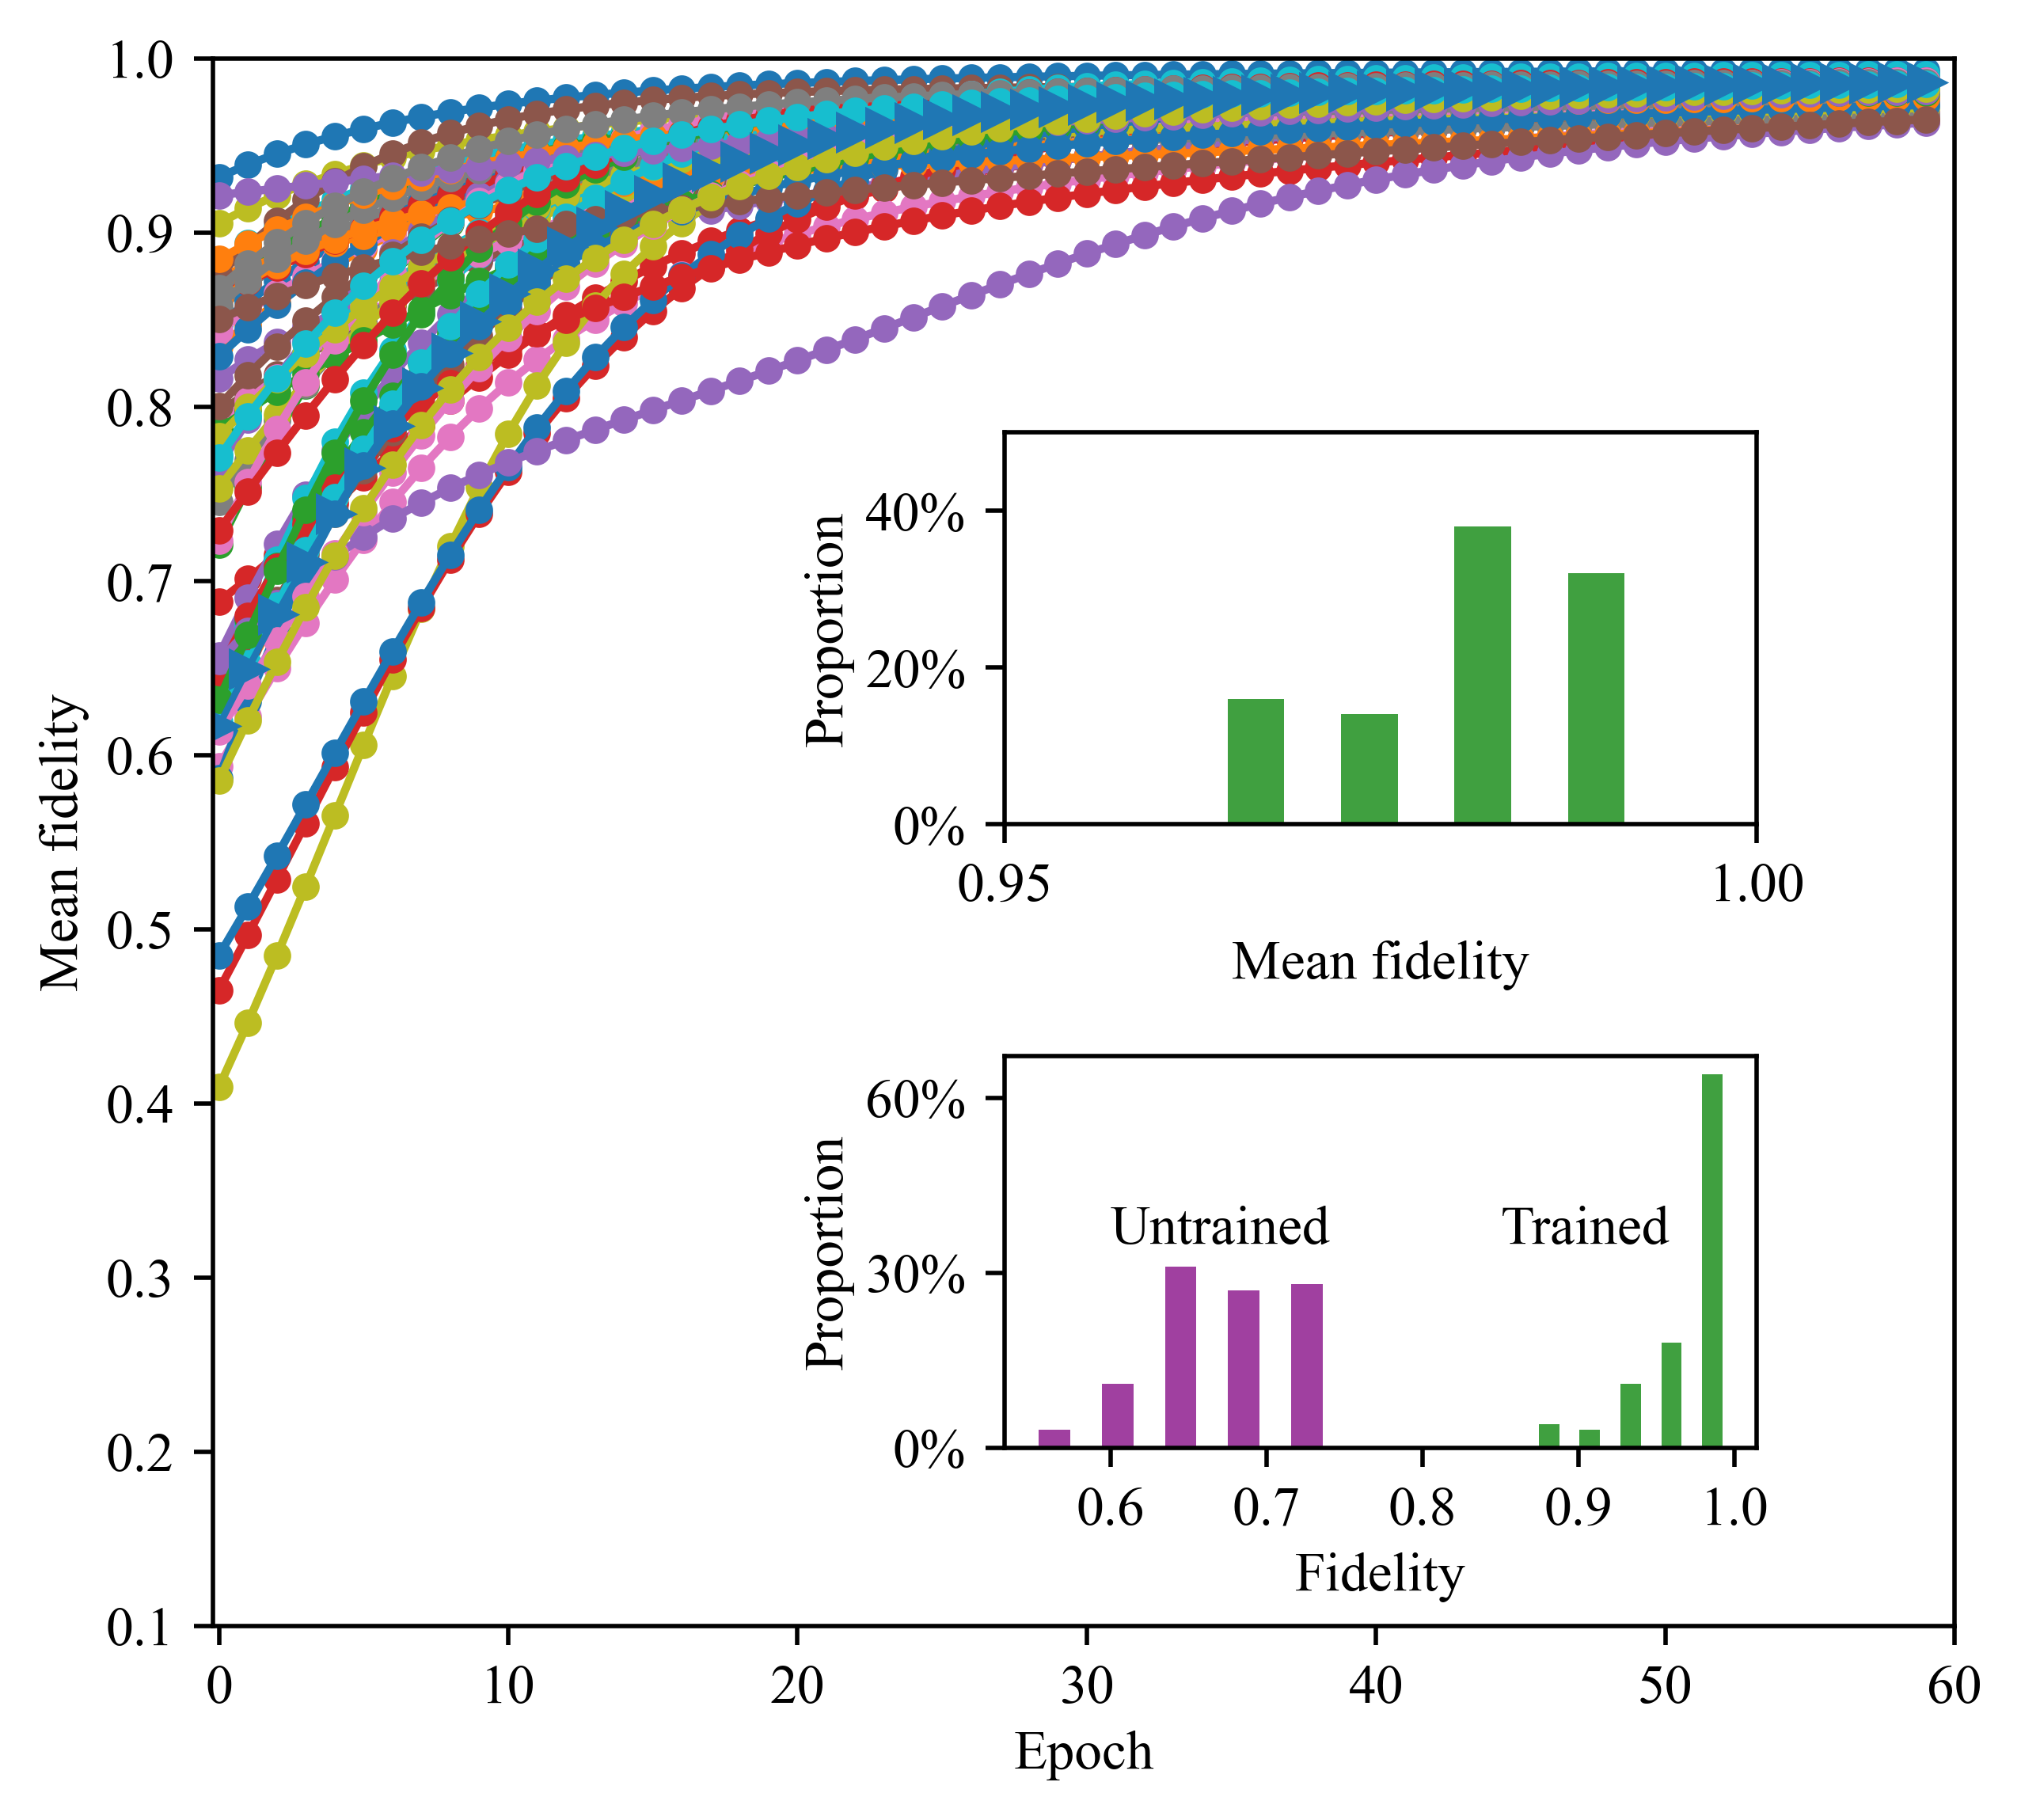

In [21]:
plt.rc('font', family = "Times New Roman", size = 10) #字体样式和大小
fig, ax = plt.subplots(figsize=(5, 4.5), dpi=500)

ax.set_xlim(left = -0.2,right = 60); ax.set_ylim(bottom = 0.1, top = 1)

for i in range(counts_X):
    ax.plot(learning_curve[i], linestyle = '-', marker = 'o', markersize = 4, linewidth = 1.5)
    
ax.plot(learning_curve[1], linestyle = '-', marker = '>', markersize = 6, linewidth = 1.2)
ax.set_xlabel('Epoch', labelpad = 3)  
ax.set_ylabel("Mean fidelity", labelpad = 3)  

 
#-------------------------------------------------------------------------------
def make_label(value, pos):
    return '%0.0f%%' % (100/50. * value)

left, bottom, width, height = 0.5,0.55,0.38,0.22
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_xlim(left = 0.95, right = 1); ax2.set_ylim(bottom = 0, top = 25);
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

counts = [ learning_curve[i][-1] for i in range(counts_X) ] ;
ax2.hist(counts, bins = 4, rwidth=0.5, color='green', histtype='bar', alpha=0.75)

ax2.yaxis.set_major_formatter(ticker.FuncFormatter(make_label))
ax2.set_xlabel('Mean fidelity', labelpad = 5)
ax2.set_ylabel('Proportion', labelpad = 2)



#-------------------------------------------------------------------------------

left, bottom, width, height = 0.5,0.2,0.38,0.22
ax3 = fig.add_axes([left, bottom, width, height])
# ax3.set_xlim(left = 0.6, right = 1); ax3.set_ylim(bottom = 0, top = 20);

# 轴坐标范围
ax3.yaxis.set_major_locator(ticker.MultipleLocator(30))
ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
# 轴标签 
ax3.set_ylabel('Proportion', labelpad = 2)
ax3.set_xlabel('Fidelity', labelpad = 3)

def make_label(value, pos):
    return '%0.0f%%' % (value)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(make_label))


#作图
ax3.hist(fidelity_untrain_list, color='purple', bins = 5,  rwidth=0.5, histtype='bar', alpha=0.75, \
           linestyle = '-', linewidth = 1)

ax3.hist(fidelity_train_list, color='green', bins = 5,  rwidth=0.5, histtype='bar', alpha=0.75, \
           linestyle = '-', linewidth = 1)

ax3.text(0.6, 35, 'Untrained', fontsize = 10)
ax3.text(0.85, 35, 'Trained', fontsize = 10)


plt.subplots_adjust(left = 0.1, bottom = 0.10, top = 0.98,right = 0.98, hspace = None, wspace = None) ;

In [28]:
# fig.savefig('figure/fig-numerical_result_two_qubit_channel.pdf', format='pdf')